In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib notebook

In [2]:
# Load iris dataset
from sklearn.datasets import load_iris

iris=load_iris()
#print(iris.DESCR)




In [4]:

X,y=iris.data,iris.target
feature_names = iris.feature_names

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=123)

#Y_test

from sklearn.linear_model import  LogisticRegression
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print(classification_report(y_test, Y_pred))
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)




              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion matrix for Logistic Regression
 [[4 0 0]
 [0 5 0]
 [0 0 6]]
accuracy_Logistic Regression : 1.000
precision_Logistic Regression : 1.000
recall_Logistic Regression: 1.000
f1-score_Logistic Regression : 1.000


In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, Y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Mean Root Squared Error: 0.0


In [5]:
#Function to calculate Mean Square Error
def lst_sq(predictions, target):
    return 0.5 * np.sum((predictions - target)**2)

#Function to calculate intwermwdiate weight using Stocastic Gradient Descent
def sgd_step(w, predictions, target, data, alpha=0.01):
    updated_data = np.concatenate((np.ones((len(data), 1)), data), axis=-1)
    diff = (predictions - target) * predictions * (np.ones(len(predictions)) - predictions)
    update = diff @ updated_data
    w_new = w - alpha * update
    
    return w_new

def sigmoid(x):
    return (1/ 1 + np.exp(-x))

In [6]:
#Split training data into batches (Each batch of size 32)
batch_size = 32
count = 100

X_train_batch = [X_train[i: i + batch_size] for i in range(0, len(X_train), batch_size)]
#print(X_train_batch)
Y_train_batch = [y_train[j: j + batch_size] for j in range(0, len(y_train), batch_size)]
#print(Y_train_batch)

In [7]:

from itertools import combinations
all_combinations = list(combinations(list(range(3, -1 , -1)), 2)) 
print(all_combinations)


[(3, 2), (3, 1), (3, 0), (2, 1), (2, 0), (1, 0)]


<IPython.core.display.Javascript object>


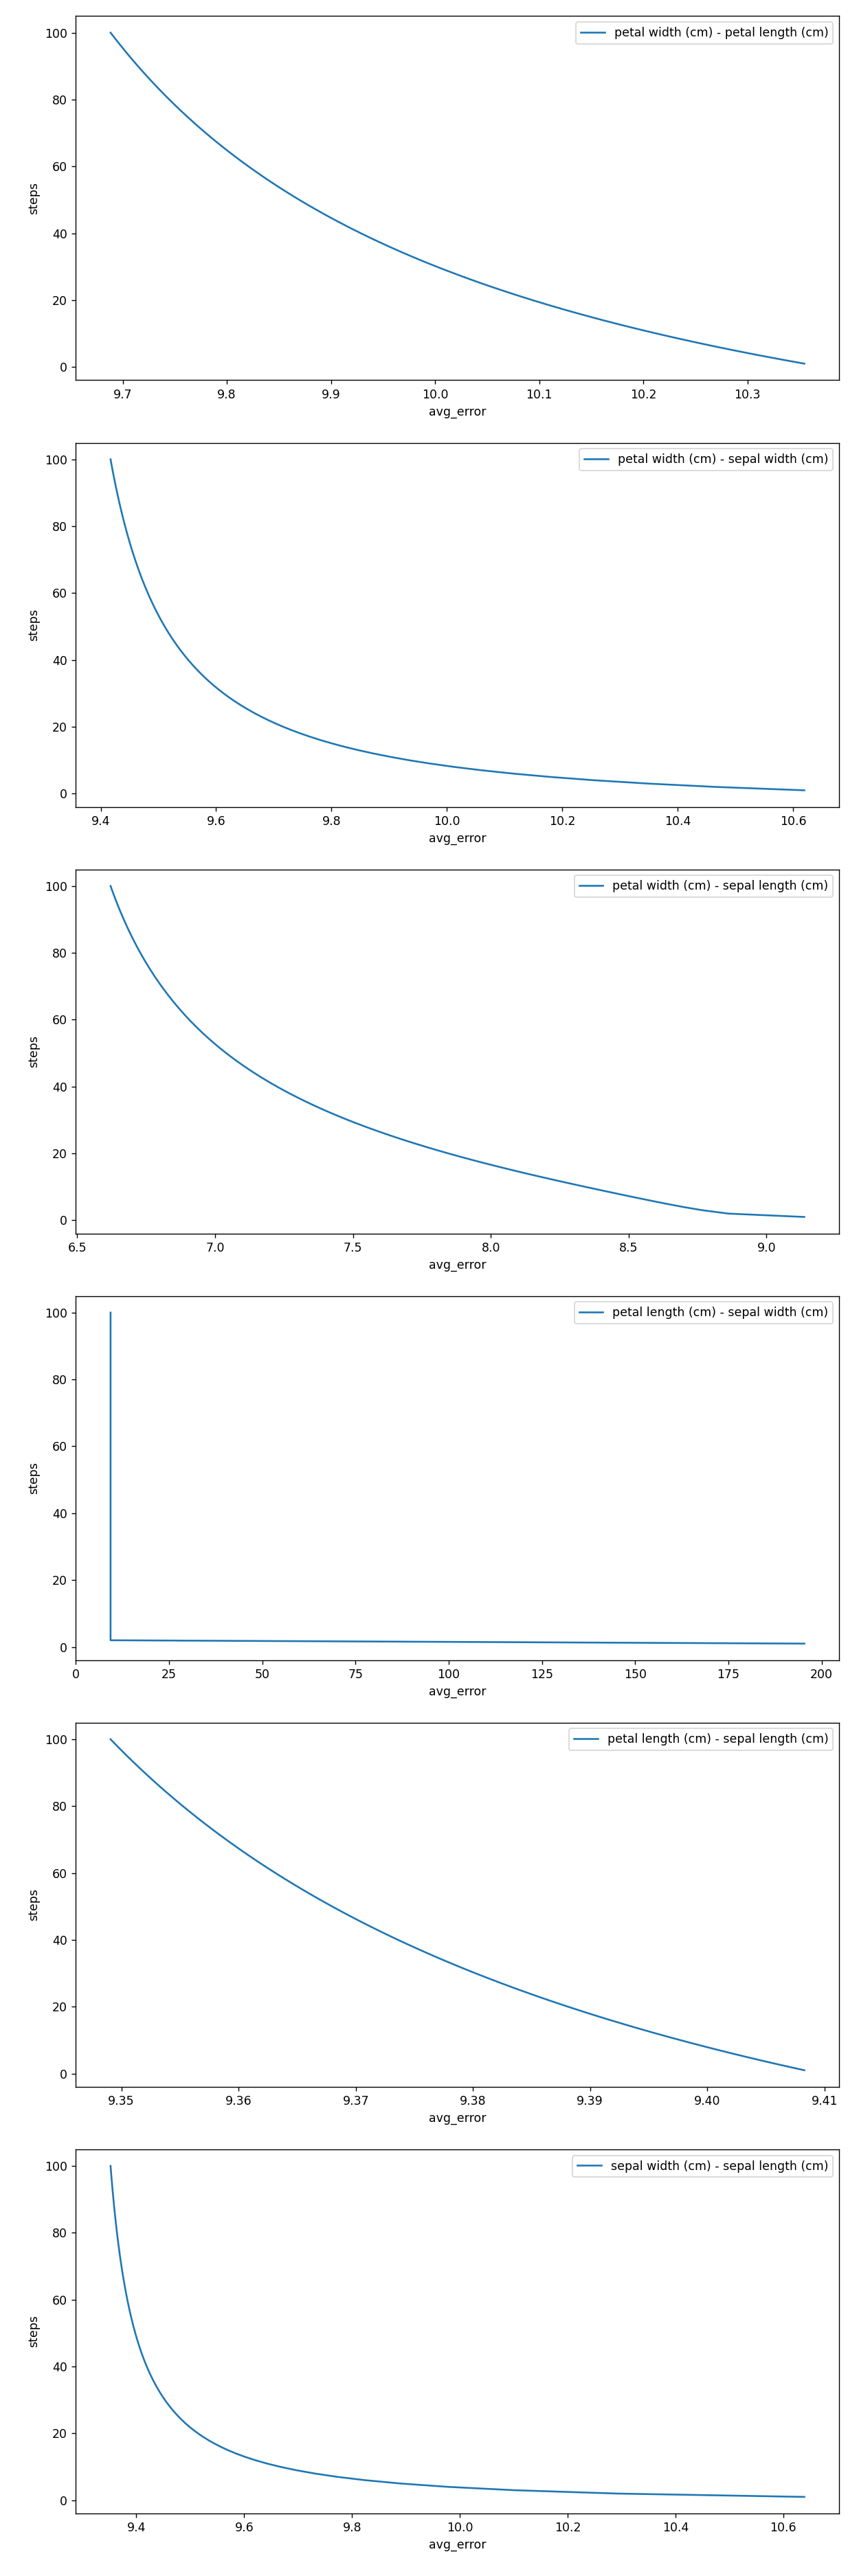

Test output for model : petal width (cm) - petal length (cm)
Error for testing dataset : 3.63249844362752
Test output for model : petal width (cm) - sepal width (cm)
Error for testing dataset : 3.5135039771230856
Test output for model : petal width (cm) - sepal length (cm)
Error for testing dataset : 2.7775199824446117
Test output for model : petal length (cm) - sepal width (cm)
Error for testing dataset : 3.5
Test output for model : petal length (cm) - sepal length (cm)
Error for testing dataset : 3.509355091585824
Test output for model : sepal width (cm) - sepal length (cm)
Error for testing dataset : 3.5133215916267426


In [8]:

fig = plt.figure(figsize=[8, 24])
for i, tup in enumerate(all_combinations):
    
    #Use random weights [w0 , w1] for each modal
    w = np.random.uniform(-1, 1, 3)
    ax = fig.add_subplot(6,1, i+1)
    ax.set_xlabel('avg_error')
    ax.set_ylabel('steps')
    error_avg_list = []
    
    for n in range(count):
        
        error_sum = 0
        for batch_index in range(len(X_train_batch)):
            batch_data = X_train_batch[batch_index][:, tup]
            batch_target = Y_train_batch[batch_index]
            batch_y_hat = w @ np.concatenate((np.ones((len(batch_data), 1)), batch_data), axis=-1).T
            batch_prediction = sigmoid(batch_y_hat)
            batch_error = lst_sq(batch_prediction, batch_target)
            error_sum += batch_error
            w = sgd_step(w, batch_prediction, batch_target, batch_data, alpha=0.001)
        
        error_avg = error_sum/len(X_train_batch)
        error_avg_list.append(error_avg)
    
    #Testing the model 
    print('Test output for model : {}'.format(feature_names[tup[0]] + ' - ' + feature_names[tup[1]]))
    
    test_y_hat = w @ np.concatenate((np.ones((len(X_test[:, tup]), 1)), X_test[:, tup]), axis=-1).T
    test_prediction = sigmoid(test_y_hat)
    test_error = lst_sq(test_prediction, y_test)
    
    print('Error for testing dataset : {}'.format(test_error))
    
    ax.plot(error_avg_list, np.linspace(1, 100, 100), label=feature_names[tup[0]] + ' - ' + feature_names[tup[1]])
    ax.legend(loc='best')
            
fig.tight_layout()
fig.savefig('logistic_regression_training_plot.png')